<div style = "Text-aling: center">


# Analisis de datos masivos 
## Regresión lineal simple en Python

# Jose Gabriel Rodriguez Rivas
# Antonio Emmanuel Martinez Rodriguez
</div>

### Regresión lineal simple en Python

Aspectos básicos/situación
En estadística, la regresión lineal es una forma de modelar una relación entre variables dependientes  y  y variables independientes  x .

En esta práctica de laboratorio, analizará los datos de ventas del distrito y realizará una regresión lineal simple para predecir las ventas netas anuales según la cantidad de tiendas en el distrito.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
salesDist = pd.read_csv('stores-dist.csv')

# Verify the imported data
salesDist.head()

,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


In [3]:
salesDist = salesDist.rename(columns={'annual net sales':'sales','number of stores in district':'stores'})
# salesDist.columns = ['district','sales','stores']
salesDist.head()

,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


Parte 2: Graficar los datos

In [4]:
salesDist.corr()

,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


In [7]:
sales = salesDist.drop('district',axis=1)
sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


De los datos del coeficiente de correlación, ¿qué tipo de asignación observó entre las ventas netas anuales y la cantidad de tiendas en el distrito?
cuando hay mas tiendas hay menos ventas 


Paso 2 – Crear un gráfico

In [9]:
y = sales['sales']
# independent variable for x axis
x = sales.stores

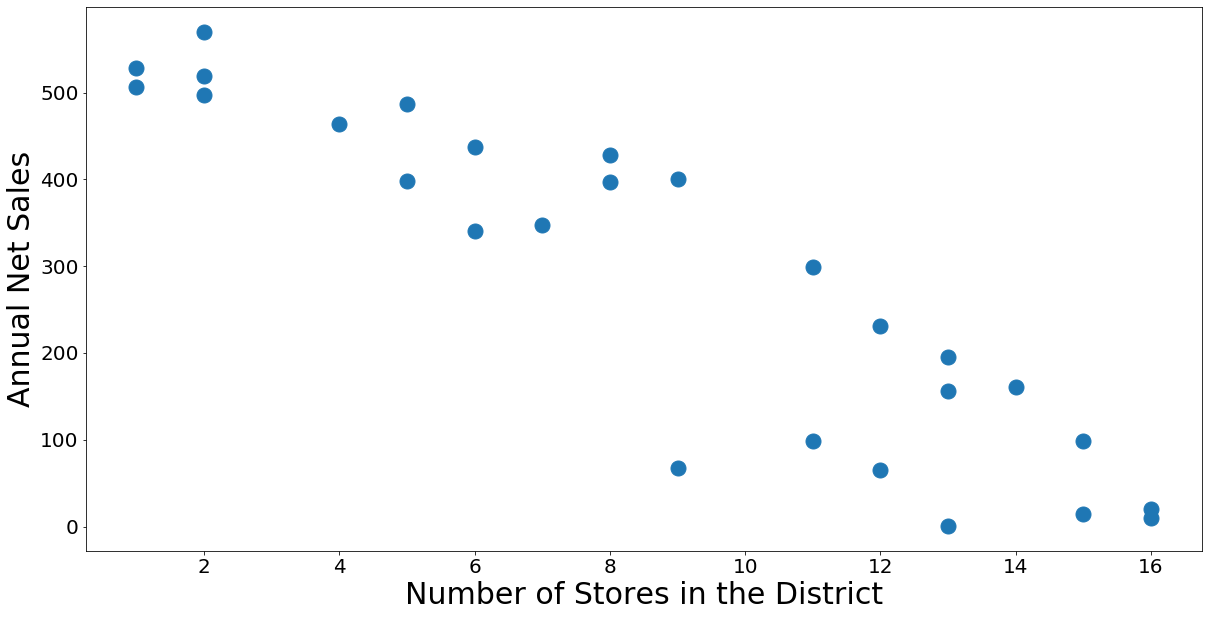

In [10]:
# Code Cell 7
# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in the District', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

Parte 3: Realizar una regresión lineal simple

Paso 1: Calcular la pendiente y la intercepción Y de la línea de regresión lineal

In [11]:
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is -35.79.
The y-intercept is 599.38.
The best fit simple linear regression line is -35.79x + 599.38.


Paso 2: Calcular el centroide
El centroide del conjunto de datos se calcula utilizando la función promedio.

In [12]:
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 8.74 and y = 286.57.


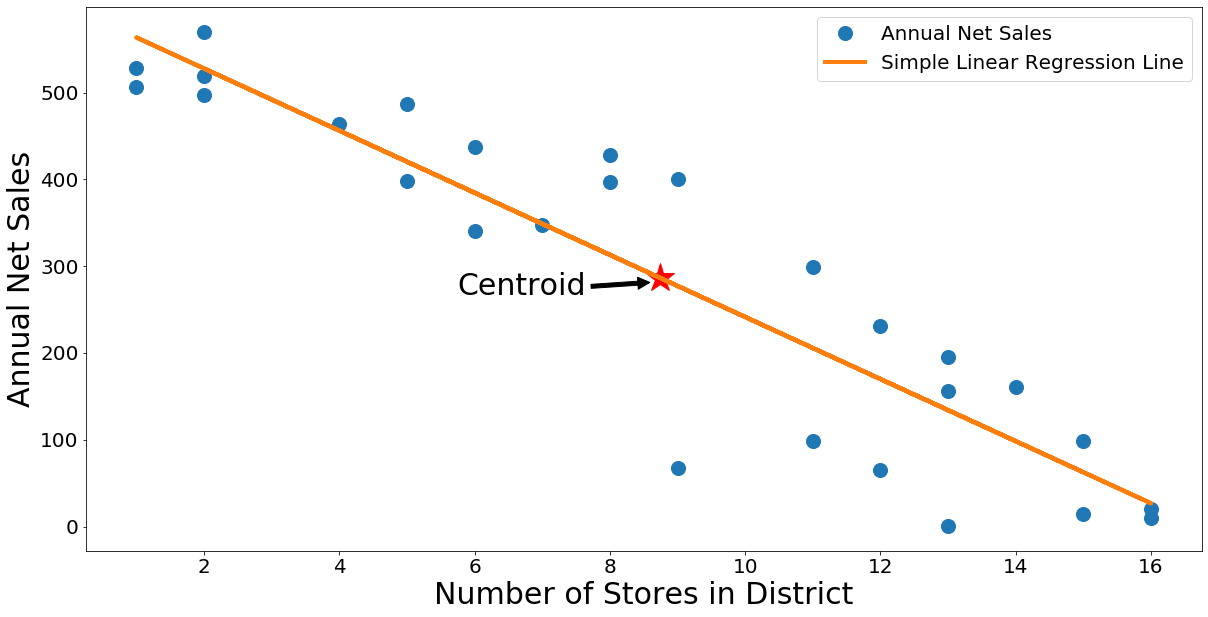

In [13]:
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "Annual Net Sales") 

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in District', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)

# Create legend
plt.legend(loc = 'upper right', fontsize = 20)

Paso 4: Predicción
Con la línea de regresión lineal, puede predecir las ventas netas anuales según la cantidad de tiendas en el distrito.

In [18]:
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must have at least 1 store in the district to predict the annual net sales.")
predict(1)

563.5926245096875

¿Cuál es la venta neta previsible si hay 4 tiendas en el distrito?

456